# Прогнозирование оттока клиентов телекоммуникационной компании

Использование машинного обучения для прогноза оттока клиентов телекоммуникационной компании.  
Используемый набор данных - https://www.kaggle.com/datasets/blastchar/telco-customer-churn.  

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Обзор датафрейма и предварительная обработка

In [2]:
# считывание данных и запись в датафрейм

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# количество строк

len(df)

7043

In [4]:
# обзор нескольких строк. Для удобства (много колонок) транспонируем датафрейм

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


|   |   |
|:---|:---|
| customerID | ID клиента |
| gender | пол клиента |
| Senior Citizen | является ли клиент пожилым (0, 1) |
| Partner | наличие партнера/супруга (да, нет) |
| Dependents | наличие иждивенцeв (да, нет) |
| tenure | количество месяцев с момента начала действия контракта |
| Phone Service | подключена ли у клиента телефонная служба (да, нет) |
| Multiple Lines | подключено ли несколько телефонных линий |
| Internet Service | тип интернет-сервиса |
| Online Security | подключен ли сервис онлайн-безопасности |
| Online Backup | подключен ли сервис резервного копирования |
| Device Protection | подключен ли сервис защиты устройств |
| Tech Support | есть ли у клиента техподдержка |
| StreamingTV | подключен ли сервис потоковой передачи ТВ |
| StreamingMovies | подключен ли сервис потоковой передачи фильмов |
| Contract | тип контракта |
| Paperless Billing | подключено ли электронное выставление счета (да, нет) |
| Payment Method | способ оплаты |
| Monthly Charges | сумма ежемесячного платежа |
| Total Charges | общая сумма начислений |
| Churn | является ли клиент ушедшим (да, нет) |

In [5]:
# опрелелим типы данных в колонках и наличие пропущенных значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Пропущенных значений как будто нет. Однако, следует обратить внимание на колонку TotalCharges, в которой должны быть числовые данные. Возможно, в записях этой колонки присутствуют пробелы.

In [6]:
# Проверка на наличие пробелов в строках колонки TotalCharges. 

df[df['TotalCharges']==' '][['customerID', 'TotalCharges']]        # выводим только колонки customerID и TotalCharges

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [7]:
# изменяем тип данных в колонке TotalCharges на числовой

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')    # errors='coerce' - пробелы становятся NaN
df.TotalCharges.fillna(0, inplace=True)                              # заменяем NaN нулями(0)

In [8]:
# приводим названия колонок и записи к единообразию: все буквы строчные, слова соединены символом "_"

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.columns[df.dtypes=='object'])

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
# обзор датафрейма после обработки

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Целевая переменная - churn. Преобразуем значения 'yes' и 'no' в 1 и 0, соответственно.

In [10]:
df.churn = (df.churn == 'yes').astype(int)

## 2. Разделение исходного набора данных

Разделим исходный набор данных на обучающий, проверочный и тестовый наборы.

In [11]:
# импорт функции для разделения данных на наборы

from sklearn.model_selection import train_test_split

In [12]:
# сперва делим на 2 набора: большой обучающий (80%) и тестовый (20%)

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)   # фиксируем параметр random_state для воспроизводимости

In [13]:
# разделим большой обучающий набор на еще на 2: обучающий и проверочный

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11) 

In [14]:
# выделим из каждого набора целевую переменную

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [15]:
# удаляем из наборов колонку 'churn'

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3. Исследовательский анализ данных

In [16]:
# еще раз проверим наличие пропущенных данных

df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
# проверим распределение целевой переменной

df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [18]:
# распределение целевой переменной в процентах

global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

Примерно 27% клиентов уходят (расторгают контракт).  
Данные несбалансированные: клиентов, расторгающих контракт, почти в 3 раза меньше, чем клиентов, которые остаются.

In [19]:
# создадим 2 списка параметров: числовые и категориальные. 
# колонку seniorcitizen относим к категориальным признакам, колонку churn не учитываем

numerical = [col for col in df_train_full.columns if df_train_full[col].dtypes != 'object' and col != 'seniorcitizen' and col != 'churn']
categorical = [col for col in df_train_full.columns if col != 'customerid' and (df_train_full[col].dtypes == 'object' or col == 'seniorcitizen')]

print(f' numerical - {numerical},\n categorical - {categorical}')

 numerical - ['tenure', 'monthlycharges', 'totalcharges'],
 categorical - ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


### 3.1. Анализ важности признаков

### 3.1.1. Сравнение глобального оттока с оттоком в разрезах по переменным 

Проведем анализ важности признаков, чтобы выяснить какие переменные влияют на целевую переменную и будут полезны для модели, а какие - нет.

In [20]:
# проверим переменную gender

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

print(f'gender==female: {round(female_mean, 2)} \n\
gender==male:   {round(male_mean, 2)} \n\
global:         {round(global_mean, 2)}')

gender==female: 0.28 
gender==male:   0.26 
global:         0.27


Цифры глобального оттока и оттока в разрезе пола довольно похожи. Значит gender не является полезной переменной при прогнозировании оттока.

Добавим для оценки разницу между "индивидуальным" оттоком и глобальным оттоком, а также коэффициент риска (отношение "индивидуального" оттока к глобальному), и посчитаем для всех категориальных признаков.

In [21]:
# импорт функции для удобного отображения таблиц в цикле

from IPython.display import display

In [22]:
# цикл по категориальным переменным

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])  # группировка по значениям категориальной переменной
    df_group['diff'] = df_group['mean'] - global_mean             # создание столбца для оценки разницы с глобальным оттоком
    df_group['rate'] = df_group['mean'] / global_mean             # создание столбца для оценки коэффициента риска
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


Важными признаками получились: seniorsitizen, partner, dependents, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, contract, paperlessbilling.

### 3.1.2. Взаимная информация

Взаимная информация показывает сколько информации мы узнаем об одной переменной, если знаем значение другой.

In [23]:
# используем функцию mutual_info_score из пакета metrics в sklearn

from sklearn.metrics import mutual_info_score

In [24]:
# дополнительная функция для удобства использования

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

In [25]:
# считаем mutual_info_score для всех категориальных переменных и создаем датафрейм с результатами

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [26]:
# чем больше коэффициент, тем более важным является признак

df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


### 3.1.3. Коэффициент корреляции

Проанализируем важность числовых признаков, оценив коэффициент корреляции с целевой переменной.

In [27]:
# рассчет коэффициента корреляции

df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Tenure (срок контракта) имеет высокую отрицательную корреляцию. Monthlycharges (ежемесячные платежи) имеет положительную корреляцию.

Анализ важности признаков нужен для исключения неважных или маловажных признаков из модели, особенно, если признаков действительно много. Однако, в этот раз я решил использоваль для построения модели все признаки. 

## 4. Конструирование признаков

Преобразуем все категориальные признаки в числовые с помощью DictVectorizer из библиотеки sklearn.

In [28]:
# преобразуем датафрейм df_train в список словарей

train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [29]:
# импорт DictVectorizer

from sklearn.feature_extraction import DictVectorizer

In [30]:
# создание экземпляра DictVectorizer и обучение на train_dict

dv = DictVectorizer(sparse=False)        # sparse=False для создания массива NumPy
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [31]:
# преобразуем train_dict в матрицу

X_train = dv.transform(train_dict)

In [32]:
# имена будущих столбцов

dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## 5. Логистическая регрессия

In [33]:
# импорт модели

from sklearn.linear_model import LogisticRegression

In [34]:
# создание и обучение модели

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [35]:
# векторизация признаков в датафрейме df_val

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [36]:
# получение предсказания вероятностей для проверочного набора данных

y_pred_val = model.predict_proba(X_val)[:, 1]     # так как (вероятность оттока + вероятность отсутствия оттока) = 1, то достаточно одного столбца 

Полученные данные являются *мягкими* прогнозами. Для получения *твердых* прогнозов вида True/False (отток/отсутствие оттока) необходимо определиться с порогом вероятности, выше которого мы будем считать отток достоверным. Либо перевести мягкие прогнозы в твердые для нескольких пороговых значений и сравнить полученные результаты.
Остановимся сперва на первом методе и выберем 0,5 в качестве порога. 

In [37]:
# записываем результаты сравнения предсказанных вероятностей с выбранным порогом 0,5 в переменныю churn_val

churn_val = y_pred_val >= 0.5

In [38]:
# оценка достоверности предсказания. сравнение предсказанного оттока с реальным в проверочном наборе

(y_val == churn_val).mean()

0.8016129032258065

Текущая модель делает правильные предсказания в 80% случаев. 

Теперь проверим достоверность для других пороговых значений. Используем для этого accuracy_score из sklearn.

In [39]:
# импорт  accuracy_score

from sklearn.metrics import accuracy_score

In [40]:
# обозначим пороговые значения

thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [41]:
# вычислим accuracy_score для каждого порогового значения

accuracies = []                            # соберем все значения accuracy_score для построения графика
for t in thresholds:
    churn = y_pred_val >= t
    acc = accuracy_score(y_val, churn)
    accuracies.append(acc)
    print('%0.1f   %0.3f' % (t, acc))

0.0   0.261
0.1   0.595
0.2   0.690
0.3   0.755
0.4   0.782
0.5   0.802
0.6   0.790
0.7   0.774
0.8   0.742
0.9   0.739
1.0   0.739


([<matplotlib.axis.XTick at 0x18a7d2c6a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

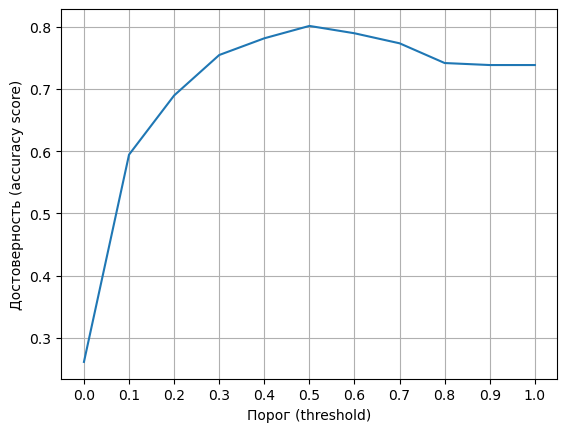

In [42]:
# график accuracy_score

plt.plot(thresholds, accuracies)
plt.xlabel('Порог (threshold)')
plt.ylabel('Достоверность (accuracy score)')
plt.grid(True)                                      # сетка
plt.xticks(thresholds)                              # отметки на оси х

Лучший порог - 0,5, лучшая достоверность - 80%.

Далее оценим хороший ли это показатель.

## 6. Оценка модели

### 6.1. Построение фиктивной модели

Для сравнения нашей модели построим фиктивную/базовую модель, которая, независимо от признаков, всегда будет предсказывать класс большинства (в несбалансированном наборе данных как у нас) - "оттока нет".

In [43]:
# создание базовой модели - массив длиной y_val, заполненный False (оттока нет)

baseline = np.repeat(False, len(y_val))

In [44]:
# вычислим достоверность базовой модели

accuracy_score(baseline, y_val)

0.7387096774193549

Достоверность фиктивной/базовой модели составила ~73,9%.

### 6.2. Матрица ошибок

Сперва самостоятельно вычислим матрицу ошибок (для понтов).

In [45]:
# напишем функцию для вычисления матрицы ошибок

def conf_mtrx(y_true, y_pred, t):
    predict_churn = (y_pred >= t)             # количество прогнозов "отток"
    predict_no_churn = (y_pred < t)           # количество прогнозов "нет оттока"
    
    actual_curn = (y_true == 1)               # количество реальных показателей "отток"
    actual_no_curn = (y_true == 0)            # количество реальных показателей "нет оттока"
    
    true_positive = (predict_churn & actual_curn).sum()              # поэлементное сравнение и подсчет совпадений 
    false_positive = (predict_churn & actual_no_curn).sum()
    
    false_negative = (predict_no_churn & actual_curn).sum()
    true_negative = (predict_no_churn & actual_no_curn).sum()
    
    confusion_table = np.array([[true_negative, false_positive],
                                [false_negative, true_positive]])     # формирование матрицы ошибок в абсолютных значениях
    confusion_table_rates = confusion_table / confusion_table.sum()   # матрица ошибок в долях
    
    return confusion_table, confusion_table_rates.round(3)

In [46]:
# вычисление матрицы ошибок для модели логистической регрессии

conf_mtrx(y_val, y_pred_val, 0.5)

(array([[1202,  172],
        [ 197,  289]]),
 array([[0.646, 0.092],
        [0.106, 0.155]]))

In [47]:
# вычисление матрицы ошибок для фиктивной/базовой модели

conf_mtrx(y_val, baseline, 1)

(array([[1374,    0],
        [ 486,    0]]),
 array([[0.739, 0.   ],
        [0.261, 0.   ]]))

Так как базовая модель для всех случаев предсказывает "оттока нет" (False), то у нее нет истинно положительных (ТР) и ложноположительных (FP) предсказаний.

Вычислим матрицу ошибок с помощью sklearn

In [48]:
# импорт метрики

from sklearn.metrics import confusion_matrix

In [49]:
# вычисление матрицы ошибок для модели логистической регрессии

print(confusion_matrix(y_val, churn_val))                               # абсолютные значения

print(confusion_matrix(y_val, churn_val, normalize = 'all').round(3))   # относительные значения

[[1202  172]
 [ 197  289]]
[[0.646 0.092]
 [0.106 0.155]]


In [50]:
# вычисление матрицы ошибок для фиктивной/базовой модели

print(confusion_matrix(y_val, baseline))

print(confusion_matrix(y_val, baseline, normalize = 'all').round(3))

[[1374    0]
 [ 486    0]]
[[0.739 0.   ]
 [0.261 0.   ]]


Значения, подсчитанные самостоятельно и с помощью sklearn, совпадают. Замечательно.  
Модель логистической регрессии довольно хорошо прогнозирует отсутствие оттока (64,6%), но допускает много ложноположительных (9,2%) и ложноотрицательных (10,6%) прогнозов (суммарно 19,8%).  
Базовая модель допускает 26,1% ложноотрицательных прогнозов.

### 6.3. Точность (precision) и отклик (recall)

Посчитаем дополнительные метрики.  
Точность (precision): $$ P = TP / (TP + FP) ,$$
где $ TP $ - истинно положительные прогнозы, $ FP $ - ложноположительные прогнозы.  

Отклик (recall): $$ TP / (TP + FN) ,$$
где $ TP $ - истинно положительные прогнозы, $ FN $ - ложноотрицательные прогнозы.

In [51]:
# функция для нахождения точности и отклика

def precision_recall(y_true, y_pred, t):
    predict_churn = (y_pred >= t)             # количество прогнозов "отток"
    predict_no_churn = (y_pred < t)           # количество прогнозов "нет оттока"
    
    actual_curn = (y_true == 1)               # количество реальных показателей "отток"
    actual_no_curn = (y_true == 0)            # количество реальных показателей "нет оттока"
    
    true_positive = (predict_churn & actual_curn).sum()              # поэлементное сравнение и подсчет совпадений 
    false_positive = (predict_churn & actual_no_curn).sum()
    
    false_negative = (predict_no_churn & actual_curn).sum()
#    true_negative = (predict_no_churn & actual_no_curn).sum() 
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    return precision.round(3), recall.round(3)

In [52]:
precision_recall(y_val, y_pred_val, 0.5)

(0.627, 0.595)

Считать точность и отклик для базовой модели не имеет смысла, так как в одном случае получится неопределенность вида 0/0 (TP=0, FP=0), а в другом просто 0 (TP=0).

In [53]:
# импорт метрики

from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_val, churn_val).round(3)

0.627

In [55]:
recall_score(y_val, churn_val).round(3)

0.595

Результаты "ручного" расчета и расчета с помощью sklearn совпали.  
Однако, точность и отклик были расчитаны для одного (лучшего) порогового значения - 0,5. 

### 6.4. ROC и AUC

Проведем оценку модели при нескольких пороговых значениях.

Рассчитаем метрики TPR (доля истинно положительных среди всех положительных) и FPR (доля ложноположительных среди всех отрицательных).
$$ TPR = TP / (TP + FN) $$  
$$ FPR = FP / (FP + TN) $$

In [56]:
# напишем функцию для рассчета матрицы ошибок и метрик TPR, FPR для всех новых порогов

def calculate_tpr_fpr(y_true, y_pred):
    scores = []                           # список для сбора результатов
    thresholds = np.linspace(0, 1, 101)   # 100 новых порогов
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_true == 1)).sum()         # истинноположительные (есть отток)
        fp = ((y_pred >= t) & (y_true == 0)).sum()         # ложноположительные
        fn = ((y_pred < t) & (y_true == 1)).sum()          # ложноотрицательные
        tn = ((y_pred < t) & (y_true == 0)).sum()          # истинно отрицательные (оттока нет)
        scores.append((t, tp, fp, fn, tn))                 # добавление результатов в список
        
    df_scores = pd.DataFrame(scores,
                             columns=['threshold', 'TP', 'FP', 'FN', 'TN'])  # преобразуем полученные результаты в датафрейм
    
    df_scores['TPR'] = df_scores.TP / (df_scores.TP + df_scores.FN)          # расчет TPR
    df_scores['FPR'] = df_scores.FP / (df_scores.FP + df_scores.TN)          # расчет FPR
    
    return df_scores

In [57]:
# рассчитаем TPR и FPR для модели логистической регрессии

df_scores = calculate_tpr_fpr(y_val, y_pred_val)

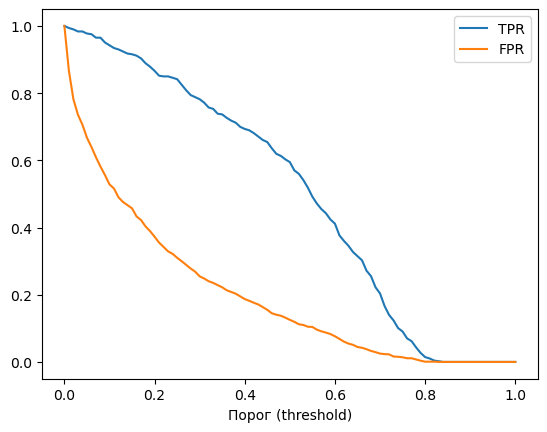

In [58]:
# построение графика TPR и FPR

plt.plot(df_scores.threshold, df_scores.TPR, label='TPR')
plt.plot(df_scores.threshold, df_scores.FPR, label='FPR')
plt.xlabel('Порог (threshold)')
plt.legend()

В идеале FPR должен снижаться быстро, указывая на то, что модель делает мало ошибок (ложноположительных прогнозов). А TPR должен снижаться медленно, указывая то, что модель хорошо прогнозирует истинноположительные результаты.

Рассчитаем TPR и FPR для **случайной** базовой модели.

In [59]:
# генерируем массив с однородными случайными числами

np.random.seed(1)                                  # фиксируем начальное значение для воспроизвадимости результатов
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [60]:
df_rand = calculate_tpr_fpr(y_val, y_rand)

In [61]:
# выведем каждую 10-ю строку датафрейма случайной базовой модели

df_rand[::10]

,threshold,TP,FP,FN,TN,TPR,FPR
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


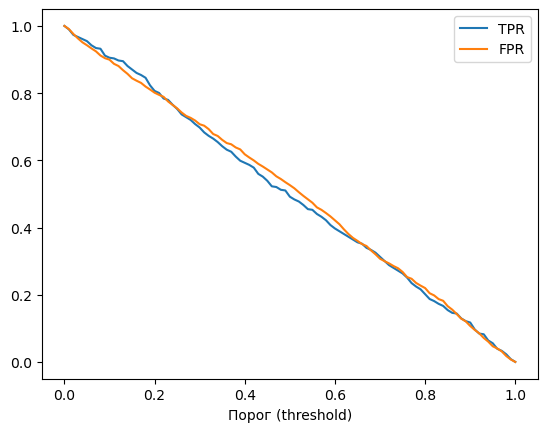

In [62]:
# график для случайной модели

plt.plot(df_rand.threshold, df_rand.TPR, label='TPR')
plt.plot(df_rand.threshold, df_rand.FPR, label='FPR')
plt.xlabel('Порог (threshold)')
plt.legend()

Добавим для сравнения идеальную модель.

In [63]:
# построение идеальной модели

num_neg = (y_val == 0).sum()    # количество отрицательных значений (нет оттока)
num_pos = (y_val == 1).sum()    # количество положительных значений (есть отток)

y_ideal = np.repeat([0, 1], [num_neg, num_pos])     # генерируем массив аналогичный y_val, но сперва идут только 0, потом 1
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos) # прогноз идеальной модели: плавное повышение от 0 до 1

In [64]:
# датафрейм с параметрами идеальной модели

df_ideal = calculate_tpr_fpr(y_ideal, y_pred_ideal)

In [65]:
# выведем каждую 10-ю строку датафрейма идеальной модели

df_ideal[::10]

,threshold,TP,FP,FN,TN,TPR,FPR
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


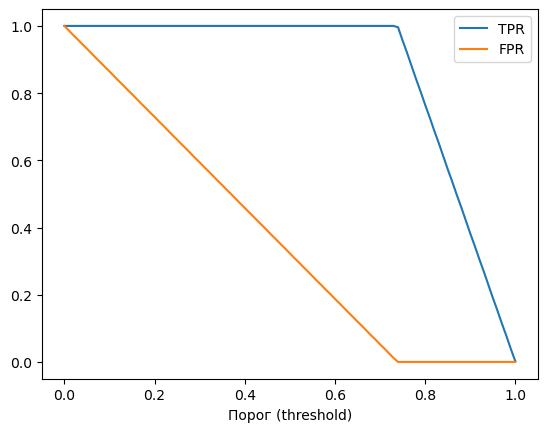

In [66]:
# график идеальной модели

plt.plot(df_ideal.threshold, df_ideal.TPR, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.FPR, label='FPR')
plt.legend()
plt.xlabel('Порог (threshold)')
plt.show()

Построим, наконец, кривую ROC.

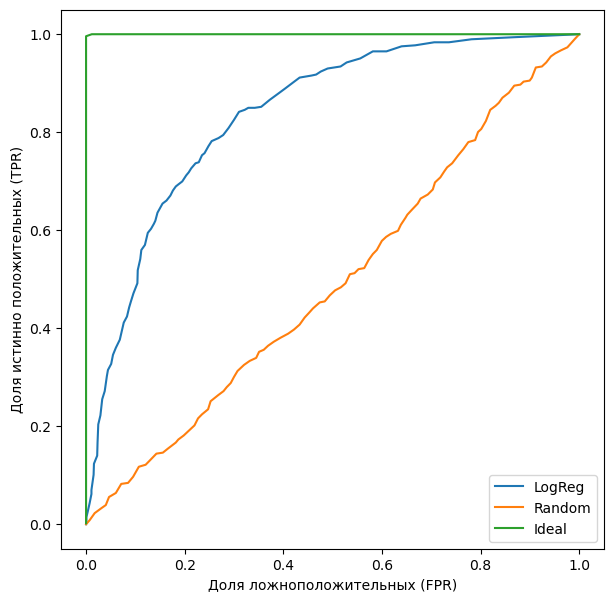

In [67]:
plt.figure(figsize=(7, 7))
plt.plot(df_scores.FPR, df_scores.TPR, label='LogReg')
plt.plot(df_rand.FPR, df_rand.TPR, label='Random')
plt.plot(df_ideal.FPR, df_ideal.TPR, label='Ideal')
plt.legend()
plt.xlabel('Доля ложноположительных (FPR)')
plt.ylabel('Доля истинно положительных (TPR)')
plt.show()

По традиции сравним с расчетом ROC с помощью sklearn.

In [68]:
# импорт roc_curve

from sklearn.metrics import roc_curve

In [69]:
FPR, TPR, thresholds = roc_curve(y_val, y_pred_val)

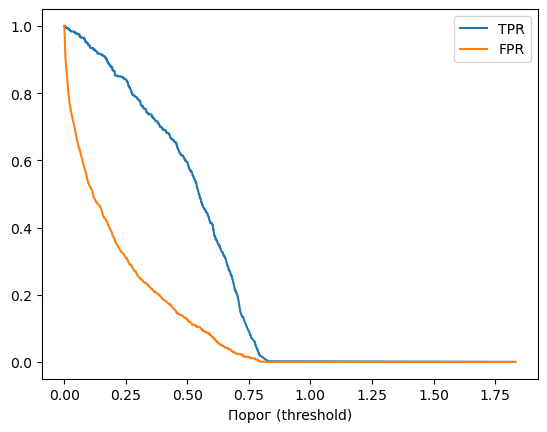

In [70]:
# построение графика TPR и FPR

plt.plot(thresholds, TPR, label='TPR')
plt.plot(thresholds, FPR, label='FPR')
plt.xlabel('Порог (threshold)')

plt.legend()

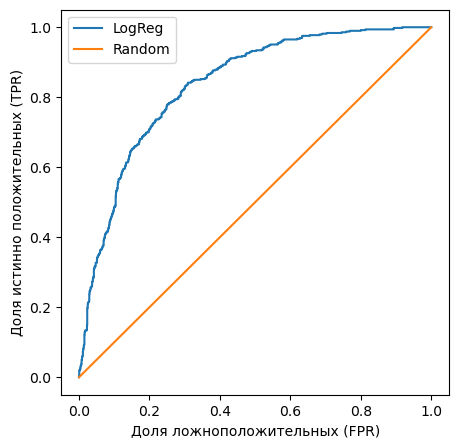

In [71]:
# слегка упрощенный график

plt.figure(figsize=(5, 5))
plt.plot(FPR, TPR, label='LogReg')
plt.plot([0, 1], [0, 1],  label='Random')
plt.xlabel('Доля ложноположительных (FPR)')
plt.ylabel('Доля истинно положительных (TPR)')
plt.legend()
plt.show()

Рассчитаем метрику AUC (площадь под кривой ROC).

In [72]:
# импорт auc из sklearn

from sklearn.metrics import auc

In [73]:
# AUC для модели логистической регрессии с округлением до 3 знака после запятой

auc(df_scores.FPR, df_scores.TPR).round(3)

0.836

In [74]:
# AUC для идеальной модели с округлением до 3 знака после запятой

auc(df_ideal.FPR, df_ideal.TPR).round(3)

1.0

In [75]:
# AUC для случайной модели с округлением до 3 знака после запятой

auc(df_rand.FPR, df_rand.TPR).round(3)

0.493

### 6.5. Проверка модели на тестовом наборе данных

In [76]:
# векторизация признаков в датафрейме df_test

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [77]:
# получение предсказания вероятностей для тестового набора данных

y_pred_test = model.predict_proba(X_test)[:, 1]     # так как (вероятность оттока + вероятность отсутствия оттока) = 1, то достаточно одного столбца 

In [78]:
# вычислим accuracy_score для каждого порогового значения

thresholds = np.linspace(0, 1, 11)
accuracies = []                            # соберем все значения accuracy_score для построения графика
for t in thresholds:
    churn = y_pred_test >= t
    acc = accuracy_score(y_test, churn)
    accuracies.append(acc)
    print('%0.1f   %0.3f' % (t, acc))

0.0   0.247
0.1   0.610
0.2   0.708
0.3   0.764
0.4   0.787
0.5   0.807
0.6   0.817
0.7   0.794
0.8   0.762
0.9   0.753
1.0   0.753


Для тестового набора данных модель показывает лучшую достоверность (81.7 %) при пороге 0.6.

In [79]:
# вычисление матрицы ошибок

conf_mtrx(y_test, y_pred_test, 0.6)

(array([[993,  68],
        [190, 158]]),
 array([[0.705, 0.048],
        [0.135, 0.112]]))

Модель логистической регрессии на тестовом наборе данных довольно хорошо прогнозирует отсутствие оттока (70.5%).  Ложноположительных прогнозов - 4.8%, ложноотрицательных - 13.5% (суммарно 18.3%), истинноположительных (есть отток) - 11.2%.

In [80]:
# точность и отклик

precision_recall(y_test, y_pred_test, 0.6)

(0.699, 0.454)

In [81]:
# рассчитаем TPR и FPR

df_scores_test = calculate_tpr_fpr(y_test, y_pred_test)

In [82]:
df_scores_test[::10]

,threshold,TP,FP,FN,TN,TPR,FPR
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,337,538,11,523,0.968391,0.507069
20,0.2,315,379,33,682,0.905172,0.357210
30,0.3,279,264,69,797,0.801724,0.248822
40,0.4,254,206,94,855,0.729885,0.194156
50,0.5,206,130,142,931,0.591954,0.122526
60,0.6,158,68,190,993,0.454023,0.064090
70,0.7,83,25,265,1036,0.238506,0.023563
80,0.8,12,0,336,1061,0.034483,0.000000
90,0.9,0,0,348,1061,0.000000,0.000000


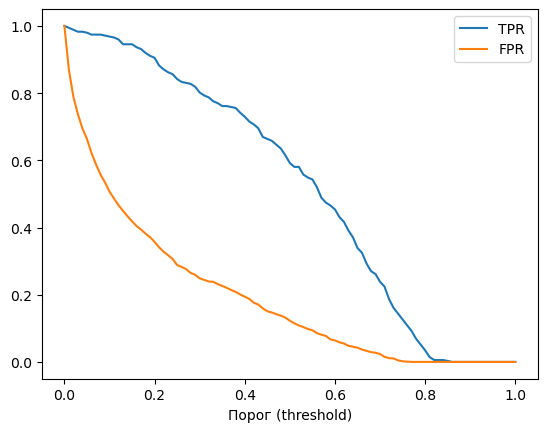

In [83]:
# построение графика TPR и FPR

plt.plot(df_scores_test.threshold, df_scores_test.TPR, label='TPR')
plt.plot(df_scores_test.threshold, df_scores_test.FPR, label='FPR')
plt.xlabel('Порог (threshold)')
plt.legend()

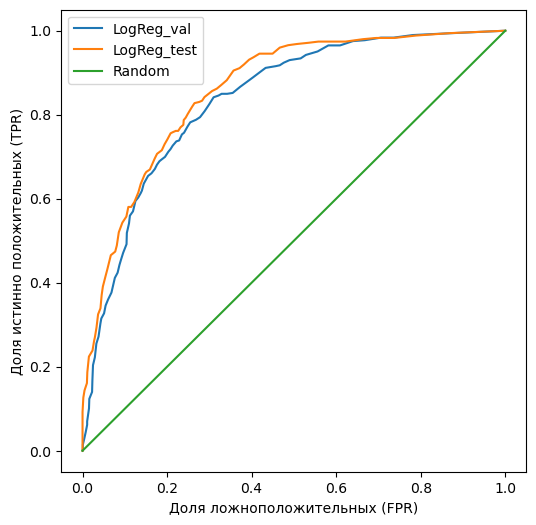

In [84]:
# кривая ROC для модели логистической регрессии на проверочном (df_val) и тестовом (df_test) наборах данных 

plt.figure(figsize=(6, 6))
plt.plot(df_scores.FPR, df_scores.TPR, label='LogReg_val')
plt.plot(df_scores_test.FPR, df_scores_test.TPR, label='LogReg_test')
plt.plot([0, 1], [0, 1], label='Random')
plt.xlabel('Доля ложноположительных (FPR)')
plt.ylabel('Доля истинно положительных (TPR)')
plt.legend()
plt.show()

In [85]:
# AUC 

auc(df_scores_test.FPR, df_scores_test.TPR).round(3)

0.859

## 7. Заключение


Для прогнозирования оттока клиентов телекомуникационной компании проведены:

1. Исследовательский анализ данных: выделение целевого параметра, разделение параметров на категориальные и числовые, анализ важности признаков, взаимная информация.  
2. Проведена векторизация признаков с помощью DictVectorizer из библиотеки sklearn.  
3. Создана и обучена модель логистической регрессии на основе LogisticRegression из библиотеки sklearn.  
4. Проведено сравнение модели с базовыми моделями (фиктивной и случайной), а также с идеальной моделью.  
5. Проведена оценка модели с помощью метрик: достоверность(accuracy), точность(precision), отклик(recall), ROC и AUC.  
6. При проверке модели на проверочном наборе данных (df_val):  
    достоверность - 0.802.  
    точность - 0.627;  
    отклик - 0.595;  
    AUC - 0.836.  
   При проверке модели на тестовом наборе данных (df_test):  
    достоверность - 0.817;  
    точность - 0.699;  
    отклик - 0.454;  
    AUC - 0.859.  
7. Кривая ROC модели показывает достаточно хороший (но не выдающийся) результат.